Importing libraries

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

Inputting data

In [2]:
path = "F:\machine-learning-ex2\ex2\ex2data1.txt"
data = pd.read_csv(
    path,
    header = None,
    names = ["Exam 1","Exam 2","Admitted"]
)

Plotting the data

Text(0,0.5,'Exam 2 Score')

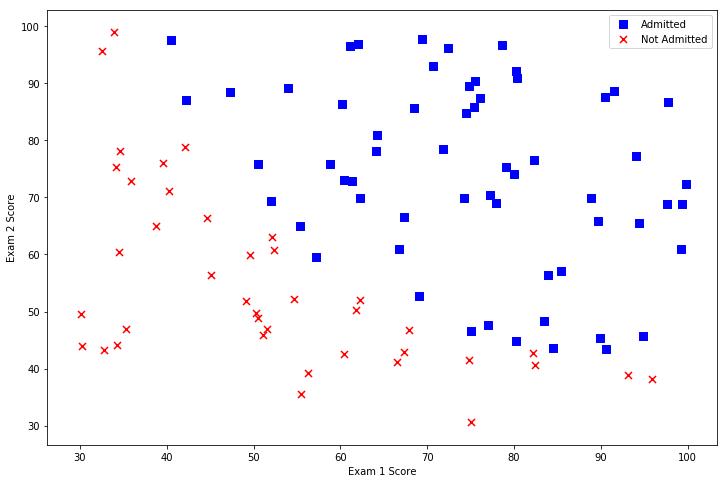

In [3]:
attended = data[data['Admitted'].isin([1])]  
notAttended = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(attended['Exam 1'], attended['Exam 2'], s=50, c='b', marker='s', label='Admitted')  
ax.scatter(notAttended['Exam 1'], notAttended['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

Sigmoid Function Definition

In [4]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

Defining Cost Function

In [5]:
def crossEntropy(theta, X, Y):  
    
    theta = np.matrix(theta)
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    
    return np.sum(np.multiply(-Y, np.log(sigmoid(X * theta.T))) - np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))) / (len(X))

Padding X with 1s (for the bias term)

In [6]:
data.insert(0, 'Ones', 1)

Seperating X and Y

In [7]:
X = data.iloc[:,0:data.shape[1]-1]  
Y = data.iloc[:,data.shape[1]-1:data.shape[1]]

Converting Dataframe to Numpy array

In [8]:
X = np.array(X.values)  
Y = np.array(Y.values)  

In [9]:
theta = np.zeros(3)

Derivative Calculation

In [10]:
def gradient(theta, X, Y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - Y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

Optimizing with respect to gradient

In [15]:
import scipy.optimize

result = scipy.optimize.fmin_tnc(func=crossEntropy, x0=theta, fprime=gradient, args=(X, Y))

Prediction Function

In [16]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
predictions = predict(np.matrix(result[0]), X)

Comparing: Prediction vs Y

In [19]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]  
accuracy = (sum(map(int, correct)) % len(correct))  

print("accuracy = ",end="")
print(accuracy,end="")
print("%")

accuracy = 89%


# Exercise 2

Importing the Data

In [20]:
path = "F:\machine-learning-ex2\ex2\ex2data2.txt"
dataset = pd.read_csv(
    path,
    header=None,
    names=["Exam 1","Exam 2","Accepted"]
)

Dividing the Data to plot it

In [164]:
accepted = dataset[dataset["Accepted"]==1]
rejected = dataset[dataset["Accepted"]==0]

Plotting the dataset

Text(0,0.5,'Exam 2 Score')

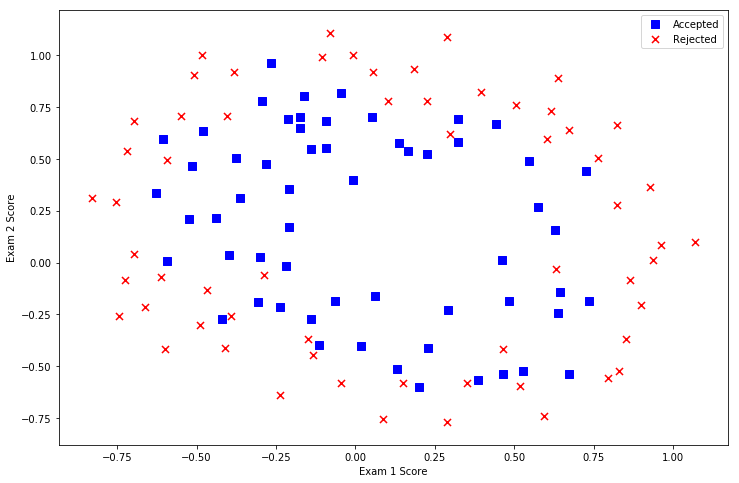

In [165]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(accepted['Exam 1'], accepted['Exam 2'], s=50, c='b', marker='s', label='Accepted')
ax.scatter(rejected['Exam 1'], rejected['Exam 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Adding Regularization Polynomials

In [166]:
degree = 5  
x1 = dataset['Exam 1']  
x2 = dataset['Exam 2']

dataset.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        dataset['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

dataset.drop('Exam 1', axis=1, inplace=True)  
dataset.drop('Exam 2', axis=1, inplace=True)

Regularized Cost Function

In [167]:
def costReg(theta, X, Y, learning_rate):
    theta = np.matrix(theta)
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    
    term1 = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    term2 = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learning_rate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(term1 - term2) / (len(X)) + reg

Regularized Gradient Descent

In [168]:
def gradientReg(theta, X, Y, learning_rate):  
    theta = np.matrix(theta)
    
    X = np.matrix(X)
    Y = np.matrix(Y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - Y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learning_rate / len(X)) * theta[:,i])

    return grad

Bifurgating X and Y

In [169]:
X2 = dataset.iloc[:,1:dataset.shape[1]]  
Y2 = dataset.iloc[:,0:1]

In [170]:
X2 = np.array(X2.values)  
Y2 = np.array(Y2.values)

theta2 = np.zeros(11)

In [186]:
learning_rate = 0.01

In [187]:
costReg(theta2, X2, Y2, learning_rate)

0.6931471805599454

In [188]:
result2 = scipy.optimize.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, Y2, learning_rate))  
result2

(array([ 0.01190145,  0.00938376, -0.03634537, -0.02261185,  0.01193151,
        -0.00410852, -0.018972  , -0.02704033,  0.00119307, -0.03110162,
        -0.00228882]), 92, 4)

In [189]:
predictions = predict(np.matrix(result2[0]), X2)  

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y2)]  
accuracy = (sum(map(int, correct)) % len(correct))

In [190]:
print("accuracy = ",end="")
print(accuracy,end="")
print("%")

accuracy = 80%
